In [1]:
from typing import List, Dict

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import *
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *
from oop_functions.analytics_utils import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools


In [2]:
filesuffixes = [
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    'experiment_participants_screened_single_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials', 
    'experiment_participants_screened_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials',
]

# _for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
# _for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
# _for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials
# _for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials
# _for_experiment_participants_screened_first_5_XGBClassifier_cancer_in_next_1_years__15_trials
# _for_experiment_not_screened_cols_single_label_XGBClassifier_cancer_in_next_1_years__15_trials

In [3]:
cv_analytics_utils: Dict[str, CvAnalyticsUtil] = {}

_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials


Cross-Validation measures:
+--------------------+----------+-------------+----------+----------+
|                    |     mean |         std |      min |      max |
|--------------------+----------+-------------+----------+----------|
| precision__class_0 | 0.999481 | 0.000114724 | 0.999291 | 0.999646 |
| recall__class_0    | 0.999787 | 9.33431e-05 | 0.999645 | 1        |
| f1-score__class_0  | 0.999634 | 7.52867e-05 | 0.999515 | 0.999823 |
| precision__class_1 | 0.519444 | 0.163775    | 0.333333 | 1        |
| recall__class_1    | 0.312963 | 0.141821    | 0.111111 | 0.555556 |
| f1-score__class_1  | 0.382415 | 0.14847     | 0.166667 | 0.714286 |
| accuracy           | 0.999268 | 0.000150484 | 0.999031 | 0.999646 |
| auc                | 0.941882 | 0.0667      | 0.811936 | 0.998388 |
+--------------------+----------+-------------+----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


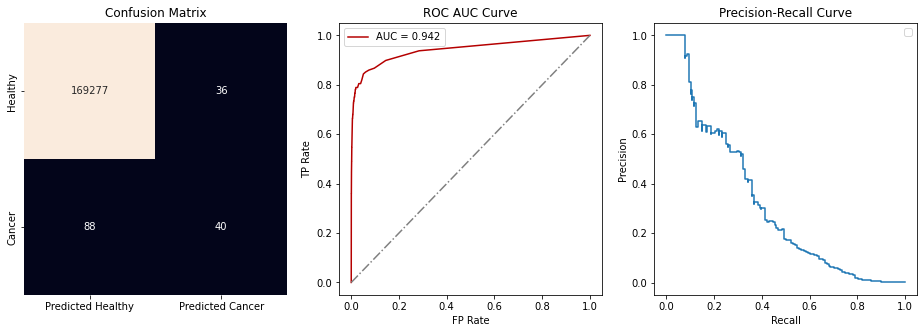

experiment_participants_screened_single_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials


Cross-Validation measures:
+--------------------+----------+-------------+-----------+----------+
|                    |     mean |         std |       min |      max |
|--------------------+----------+-------------+-----------+----------|
| precision__class_0 | 0.999663 | 0.000126079 | 0.999467  | 0.999823 |
| recall__class_0    | 0.996993 | 0.000786017 | 0.99548   | 0.997871 |
| f1-score__class_0  | 0.998326 | 0.000420209 | 0.997558  | 0.998846 |
| precision__class_1 | 0.129045 | 0.0546217   | 0.0576923 | 0.225806 |
| recall__class_1    | 0.552778 | 0.172133    | 0.25      | 0.777778 |
| f1-score__class_1  | 0.20799  | 0.0832824   | 0.1       | 0.35     |
| accuracy           | 0.996659 | 0.000837308 | 0.995129  | 0.997695 |
| auc                | 0.943784 | 0.0440374   | 0.865928  | 0.998103 |
+--------------------+----------+-------------+-----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


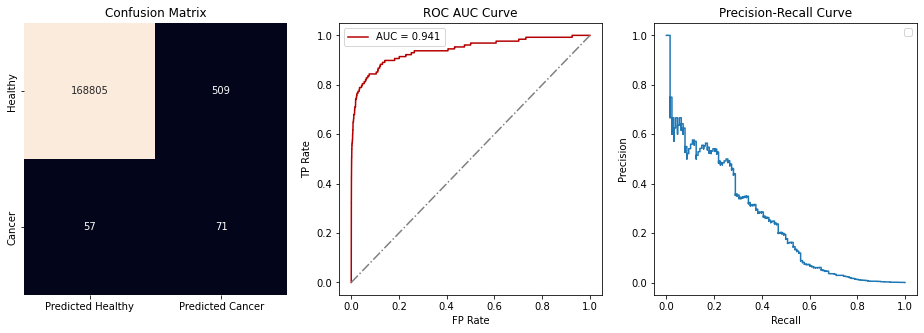

experiment_participants_screened_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials


Cross-Validation measures:
+--------------------+-----------+-------------+----------+----------+
|                    |      mean |         std |      min |      max |
|--------------------+-----------+-------------+----------+----------|
| precision__class_0 | 0.999538  | 0.000231329 | 0.999016 | 0.999823 |
| recall__class_0    | 0.996637  | 0.000857611 | 0.995399 | 0.998152 |
| f1-score__class_0  | 0.998085  | 0.000428087 | 0.997233 | 0.998767 |
| precision__class_1 | 0.0835833 | 0.0602229   | 0        | 0.176471 |
| recall__class_1    | 0.38277   | 0.241106    | 0        | 0.777778 |
| f1-score__class_1  | 0.133621  | 0.0912577   | 0        | 0.285714 |
| accuracy           | 0.996179  | 0.00085284  | 0.994482 | 0.997538 |
| auc                | 0.825113  | 0.109238    | 0.649522 | 0.982172 |
+--------------------+-----------+-------------+----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


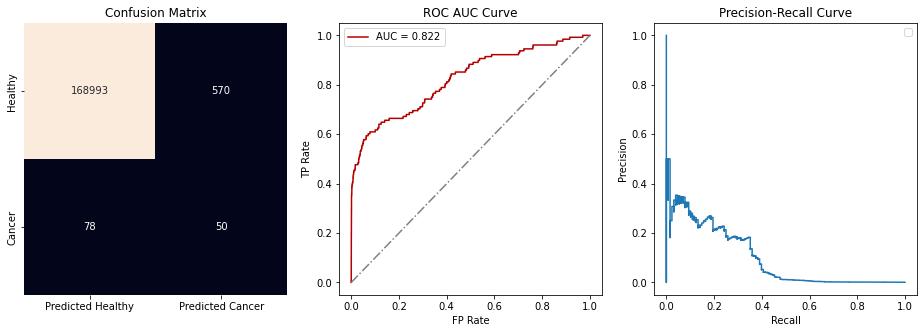

In [4]:
for filesuffix in filesuffixes:
    print(filesuffix)
    cv_analytics_util = load_cv_analytics_util_see_stats(filesuffix)
    cv_analytics_utils[filesuffix] = cv_analytics_util

X-axis -1 means that somewhere withing the next year person gets cancer. -2 means somewhere between year -1 and 0 person gets cancer.

While for patients who developed cancer, we alligned them by the year when they got cancer. So, what I did is that I looked at the people who got cancer within the first 5 years of the experiment and who got cancer within that period. I aligned them on the year they got cancer and calculated the average estimated probability of them getting cancer as predicted by model 1 year before actually getting cancer, 2 years before actually getting cancer and so on. This is what the result I got based on the dataset with questionnaire and screening data:

There is an interesting correlation, and we can see that the increase in the probability is non-linear. (I also included the standard deviation interval). On the other hand, the graph based on the same selection of individuals, but only using the questionnaire data, did not exhibit such characteristics:

For the individuals who did not develop cancer, they were alligned by the date of their last exam. Just to verify if there is no fluke, I tested this also on a general population and there is no correlation (they are just aligned based on the last observation)

_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 0
+---------------------------+---------+------------+------------+-------+-----------+-------+------------+------------+
|                           |   count |       mean |        std |   min |       25% |   50% |        75% |        max |
|---------------------------+---------+------------+------------+-------+-----------+-------+------------+------------|
| cancer_in_next_1_years_-6 |       8 | 0.00166667 | 0.00251976 |     0 | 0         | 0     | 0.00333333 | 0.00666667 |
| cancer_in_next_1_years_-5 |      21 | 0.00857143 | 0.0321726  |     0 | 0         | 0     | 0          | 0.146667   |
| cancer_in_next_1_years_-4 |      42 | 0.0259524  | 0.097923   |     0 | 0         | 0     | 0.00583333 | 0.58       |
| cancer_in_next_1_years_-3 |      59 | 0.0121469  | 0.0336694  |     0 | 0         | 0     | 0.00333333 | 0.19       |
| cancer_in_next_1_years_-2 |

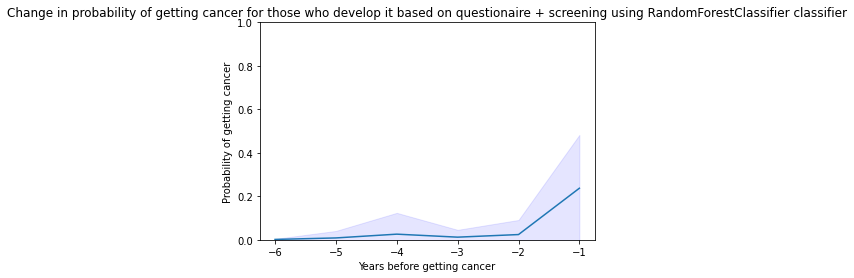

+---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------+
|                           |   count |       mean |       std |   min |   25% |   50% |        75% |      max |
|---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------|
| cancer_in_next_1_years_-6 |   20949 | 0.00398396 | 0.0170506 |     0 |     0 |     0 | 0.00333333 | 0.626667 |
| cancer_in_next_1_years_-5 |   22319 | 0.00399062 | 0.0174247 |     0 |     0 |     0 | 0.00333333 | 0.586667 |
| cancer_in_next_1_years_-4 |   25070 | 0.00399934 | 0.0168101 |     0 |     0 |     0 | 0.00333333 | 0.576667 |
| cancer_in_next_1_years_-3 |   26219 | 0.00461561 | 0.0198183 |     0 |     0 |     0 | 0.00333333 | 0.633333 |
| cancer_in_next_1_years_-2 |   24683 | 0.00375792 | 0.0192613 |     0 |     0 |     0 | 0          | 0.666667 |
| cancer_in_next_1_years_-1 |   30552 | 0.00648512 | 0.0325748 |     0 |     0 |     0 | 0.00333

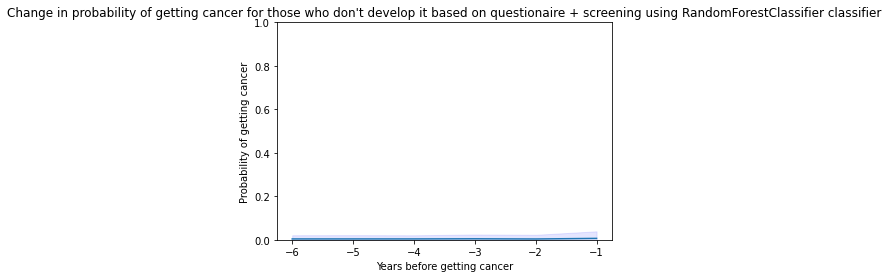

experiment_participants_screened_single_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials
Added new records: 0
+---------------------------+---------+------------+------------+-------------+-------------+-------------+-------------+------------+
|                           |   count |       mean |        std |         min |         25% |         50% |         75% |        max |
|---------------------------+---------+------------+------------+-------------+-------------+-------------+-------------+------------|
| cancer_in_next_1_years_-6 |       8 | 0.00150415 | 0.00156809 | 0.000175399 | 0.000270052 | 0.000820572 | 0.00241809  | 0.00403006 |
| cancer_in_next_1_years_-5 |      21 | 0.0258624  | 0.106944   | 0.000118321 | 0.000268617 | 0.000452017 | 0.000930233 | 0.49112    |
| cancer_in_next_1_years_-4 |      42 | 0.0424556  | 0.177323   | 7.95349e-05 | 0.000298688 | 0.000617473 | 0.00273289  | 0.995935   |
| cancer_in_next_1_years_-3 |      59 | 0.0222106  | 0.128338   | 7.95

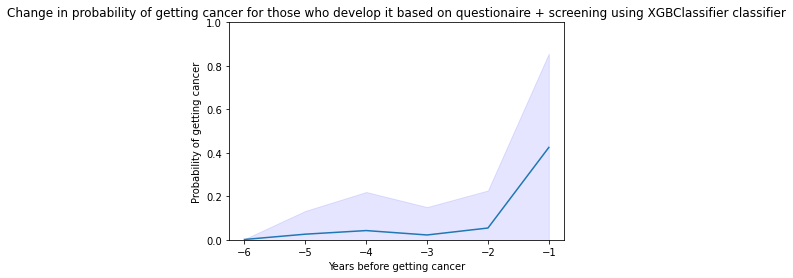

+---------------------------+---------+------------+-----------+-------------+-------------+-------------+------------+----------+
|                           |   count |       mean |       std |         min |         25% |         50% |        75% |      max |
|---------------------------+---------+------------+-----------+-------------+-------------+-------------+------------+----------|
| cancer_in_next_1_years_-6 |   20949 | 0.00586132 | 0.0361654 | 3.28024e-05 | 0.000337842 | 0.000767694 | 0.0021411  | 0.997264 |
| cancer_in_next_1_years_-5 |   22319 | 0.0060058  | 0.0399148 | 3.49078e-05 | 0.000331686 | 0.00075728  | 0.00207411 | 0.99849  |
| cancer_in_next_1_years_-4 |   25071 | 0.00608737 | 0.0387658 | 3.29925e-05 | 0.000333661 | 0.000768832 | 0.00208201 | 0.996425 |
| cancer_in_next_1_years_-3 |   26219 | 0.00703928 | 0.0466352 | 2.04853e-05 | 0.000332972 | 0.000758827 | 0.00216263 | 0.998132 |
| cancer_in_next_1_years_-2 |   24683 | 0.00635206 | 0.0472507 | 1.95565e-05 | 0.00

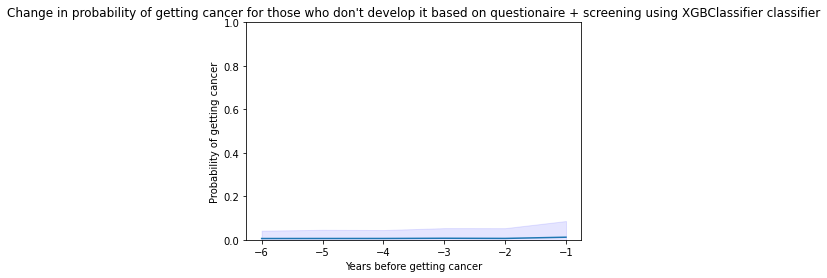

experiment_participants_screened_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials
+---------------------------+---------+------------+------------+-------------+------------+------------+------------+-----------+
|                           |   count |       mean |        std |         min |        25% |        50% |        75% |       max |
|---------------------------+---------+------------+------------+-------------+------------+------------+------------+-----------|
| cancer_in_next_1_years_-6 |       8 | 0.00466646 | 0.00378385 | 0.000633523 | 0.00198607 | 0.00315778 | 0.00703849 | 0.0106984 |
| cancer_in_next_1_years_-5 |      21 | 0.00769262 | 0.0202468  | 0.000383665 | 0.001152   | 0.00244812 | 0.00464306 | 0.0950095 |
| cancer_in_next_1_years_-4 |      42 | 0.0363978  | 0.157744   | 0.000217078 | 0.00134714 | 0.00320189 | 0.00625623 | 0.982127  |
| cancer_in_next_1_years_-3 |      59 | 0.0275448  | 0.128744   | 0.000198047 | 0.00147735 | 0.00433026 | 0.0112175  | 0.9

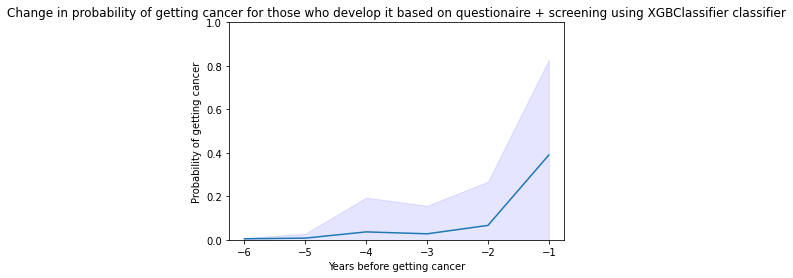

+---------------------------+---------+-----------+-----------+-------------+------------+------------+------------+----------+
|                           |   count |      mean |       std |         min |        25% |        50% |        75% |      max |
|---------------------------+---------+-----------+-----------+-------------+------------+------------+------------+----------|
| cancer_in_next_1_years_-6 |   20949 | 0.0112361 | 0.044698  | 5.56495e-05 | 0.00111364 | 0.00257877 | 0.00690664 | 0.987486 |
| cancer_in_next_1_years_-5 |   22319 | 0.0113157 | 0.0454579 | 4.10353e-05 | 0.00110372 | 0.00259352 | 0.00696359 | 0.993553 |
| cancer_in_next_1_years_-4 |   25071 | 0.0113208 | 0.0433549 | 4.91262e-05 | 0.00114673 | 0.00272286 | 0.00743979 | 0.991243 |
| cancer_in_next_1_years_-3 |   26219 | 0.0127681 | 0.0536017 | 5.84529e-05 | 0.00115918 | 0.00280522 | 0.00757821 | 0.996538 |
| cancer_in_next_1_years_-2 |   24683 | 0.0129113 | 0.0507388 | 6.04674e-05 | 0.00124736 | 0.00295079 | 

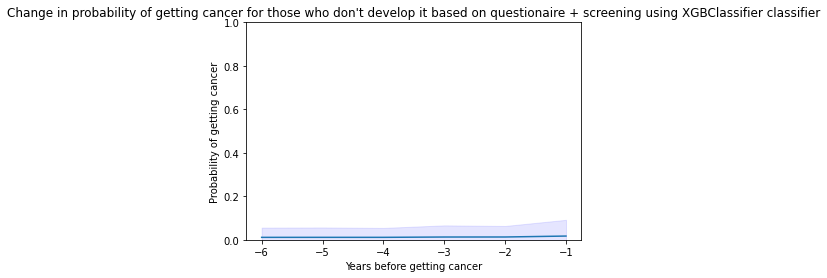

In [8]:
for filesuffix, cv_analytics_util in cv_analytics_utils.items():
    print(filesuffix)
    label = cv_analytics_util.get_label()
    classifier_name = cv_analytics_util.get_classifier_type()
    based_on = 'questionaire'
    if 'screened' in filesuffix:
        based_on += ' + screening'
    
    if 'screened_single_first_5' in filesuffix:
        cv_analytics_util.merge_in_dataset(get_screened_first_5_no_process_dataset(label = label))
    full_dataset = cv_analytics_util.get_dataset_with_predictions()
    full_dataset_cancer = extract_full_dataset_filter_cancer(full_dataset)
    full_dataset_no_cancer = extract_full_dataset_filter_no_cancer(full_dataset)

    title_caner = f'Change in probability of getting cancer for those who develop it based on {based_on} using {classifier_name} classifier'
    title_no_caner = f'Change in probability of getting cancer for those who don\'t develop it based on {based_on} using {classifier_name} classifier'

    plot_change_in_confidence(full_dataset_cancer, title=title_caner)
    plt.show()
    plot_change_in_confidence(full_dataset_no_cancer, title=title_no_caner)
    plt.show()

In [ ]:
cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')

In [ ]:
full_dataset = cv_analytics_util.get_dataset_with_predictions()

threshold = 0.2
idx = full_dataset[(full_dataset['cancer_in_next_1_years_prob'] >= threshold) & (full_dataset['ovar_cancer'] == 0)]['plco_id'].unique()
full_dataset = full_dataset[full_dataset['plco_id'].isin(idx)]
full_dataset = full_dataset[full_dataset['study_yr'] >= 0]
full_dataset = full_dataset[full_dataset['ovar_observe_year'] <= 5]
dict_years_pred = {}
 
for plco_id in full_dataset['plco_id'].unique():
    # TODO: i can change min and max
    dict_years_pred[plco_id] = full_dataset[(full_dataset['plco_id'] == plco_id) & (full_dataset['cancer_in_next_1_years_prob'] >= threshold)]['ovar_observe_year'].min()
    full_dataset = full_dataset[((full_dataset['plco_id'] == plco_id) & (full_dataset['ovar_observe_year'] <= dict_years_pred[plco_id])) | (full_dataset['plco_id'] != plco_id)]

+---------------------------+---------+-----------+-----------+-------------+------------+-----------+-----------+----------+
|                           |   count |      mean |       std |         min |        25% |       50% |       75% |      max |
|---------------------------+---------+-----------+-----------+-------------+------------+-----------+-----------+----------|
| cancer_in_next_1_years_-6 |      66 | 0.0283591 | 0.0389536 | 0.000624935 | 0.00347049 | 0.0116734 | 0.041293  | 0.192557 |
| cancer_in_next_1_years_-5 |     128 | 0.0357683 | 0.0485467 | 0.000183095 | 0.00390084 | 0.0145995 | 0.0404848 | 0.18645  |
| cancer_in_next_1_years_-4 |     216 | 0.0362046 | 0.0449836 | 0.000449269 | 0.00419053 | 0.0154027 | 0.0557523 | 0.19156  |
| cancer_in_next_1_years_-3 |     357 | 0.0384593 | 0.0479167 | 0.000287728 | 0.0042182  | 0.0161007 | 0.059161  | 0.198421 |
| cancer_in_next_1_years_-2 |     511 | 0.0498267 | 0.0555847 | 0.000239296 | 0.00677231 | 0.0255009 | 0.0842242 | 0.1

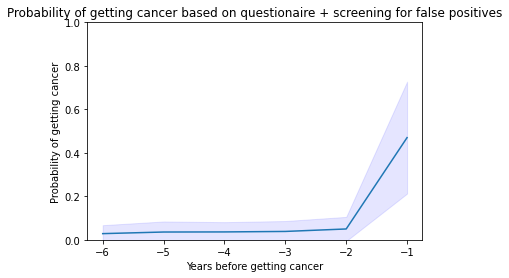

In [ ]:
# full_dataset = full_dataset[full_dataset['cancer_in_next_1_years_prob'] >= threshold]
plot_change_in_confidence(full_dataset, title='Probability of getting cancer based on questionaire + screening for false positives')